PREDICTING THE NEED OF HOUSING LOANS

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset_bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


CLEANING THE DATASETS

In [3]:
#Change prediction column name

df.rename(columns={'y':'ifCreatedAccount'}, inplace=True)
df.rename(columns={'housing':'housingLoan'}, inplace=True)

df

,age,job,marital,education,default,balance,housingLoan,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ifCreatedAccount
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Drop columns with too many 'unknown' values
#Drop contact and poutcome

df.drop(['contact', 'poutcome'], axis='columns', inplace=True)

df.drop([ 'previous', 'duration', 'default', 'marital', 'loan', 'day', 'campaign'], axis='columns', inplace=True)
df

,age,job,education,balance,housingLoan,month,pdays,ifCreatedAccount
0,58,management,tertiary,2143,yes,may,-1,no
1,44,technician,secondary,29,yes,may,-1,no
2,33,entrepreneur,secondary,2,yes,may,-1,no
3,47,blue-collar,unknown,1506,yes,may,-1,no
4,33,unknown,unknown,1,no,may,-1,no
...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,825,no,nov,-1,yes
45207,71,retired,primary,1729,no,nov,-1,yes
45208,72,retired,secondary,5715,no,nov,184,yes
45209,57,blue-collar,secondary,668,no,nov,-1,no


In [5]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [6]:
#Change yes = 1 no = 0
#Give values to each job and each month from 1 to 12

df['ifCreatedAccount'] = df['ifCreatedAccount'].map({'yes': 1, 'no': 0})
df['month'] = df['month'].map({'jan': 1, 'feb': 2,'mar':3,'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9,'oct':10,'nov': 11,'dec': 12})
df['housingLoan'] = df['housingLoan'].map({'yes': 1, 'no': 0})
df['job'] = df['job'].map({'blue-collar': 1, 'management': 2,'technician':3,'admin.': 4,'services': 5, 'retired': 6, 'self-employed': 7, 'entrepreneur': 8, 'unemployed': 9,'housemaid':10,'student': 11,'unknown': 12})
df['education'] = df['education'].map({'primary': 1, 'secondary': 2,'tertiary':3,'unknown': 0})

df

,age,job,education,balance,housingLoan,month,pdays,ifCreatedAccount
0,58,2,3,2143,1,5,-1,0
1,44,3,2,29,1,5,-1,0
2,33,8,2,2,1,5,-1,0
3,47,1,0,1506,1,5,-1,0
4,33,12,0,1,0,5,-1,0
...,...,...,...,...,...,...,...,...
45206,51,3,3,825,0,11,-1,1
45207,71,6,1,1729,0,11,-1,1
45208,72,6,2,5715,0,11,184,1
45209,57,1,2,668,0,11,-1,0


In [7]:
#Rearrange data columns

df = df[['age','job', 'education', 'balance', 'month', 'pdays', 'ifCreatedAccount', 'housingLoan']]
df.head()

,age,job,education,balance,month,pdays,ifCreatedAccount,housingLoan
0,58,2,3,2143,5,-1,0,1
1,44,3,2,29,5,-1,0,1
2,33,8,2,2,5,-1,0,1
3,47,1,0,1506,5,-1,0,1
4,33,12,0,1,5,-1,0,0


In [8]:
df['housingLoan'].value_counts()

1    25130
0    20081
Name: housingLoan, dtype: int64

Text(0.5, 0, 'Housing Loan is taken or not')

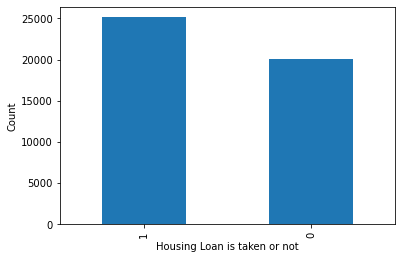

In [9]:
#Plot of Count
import matplotlib.pyplot as plt

df['housingLoan'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Housing Loan is taken or not')

In [11]:
#Final dataset after cleaning

df . to_csv("HL_cleaned.csv", index=False)

In [12]:
df_new = pd.read_csv('HL_cleaned.csv')
df_new

,age,job,education,balance,month,pdays,ifCreatedAccount,housingLoan
0,58,2,3,2143,5,-1,0,1
1,44,3,2,29,5,-1,0,1
2,33,8,2,2,5,-1,0,1
3,47,1,0,1506,5,-1,0,1
4,33,12,0,1,5,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,3,3,825,11,-1,1,0
45207,71,6,1,1729,11,-1,1,0
45208,72,6,2,5715,11,184,1,0
45209,57,1,2,668,11,-1,0,0


CREATING MODELS

In [13]:

### Independent and Dependent features

X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [14]:
X.head()

,age,job,education,balance,month,pdays,ifCreatedAccount
0,58,2,3,2143,5,-1,0
1,44,3,2,29,5,-1,0
2,33,8,2,2,5,-1,0
3,47,1,0,1506,5,-1,0
4,33,12,0,1,5,-1,0


In [15]:
y.tail()

45206    0
45207    0
45208    0
45209    0
45210    0
Name: housingLoan, dtype: int64

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
# Prediction
y_pred=rfc.predict(X_test)

In [20]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7337068711294603

In [21]:
# Create a Pickle file using serialization for Random Forest Classifier
import pickle
pickle_out = open("H-RandomForestC.pkl","wb")
pickle.dump(rfc, pickle_out)
pickle_out.close()

In [22]:
#Implement Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB()

In [23]:
NBy_pred=NBclassifier.predict(X_test)

In [25]:
#checking accuracy
NBscore=accuracy_score(y_test,NBy_pred)
NBscore

0.6401503981126512

In [26]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
DTy_pred=DTclassifier.predict(X_test)

In [28]:
#Checking accuracy
DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.6792981421409614

In [29]:
DT_pickle_out = open("H-DTClassifier.pkl","wb")
pickle.dump(DTclassifier, DT_pickle_out)
DT_pickle_out.close()

In [30]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
KNNY_pred=KNNclassifier.predict(X_test)

In [32]:
#Checking accuracy
KNNscore=accuracy_score(y_test,KNNY_pred)
KNNscore

0.6301975818342672

In [33]:
KNN_pickle_out = open("H-KNNClassifier.pkl","wb")
pickle.dump(KNNclassifier, KNN_pickle_out)
KNN_pickle_out.close()

ANALYSING DATA BY PLOTTING GRAPHS

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 20.0)]

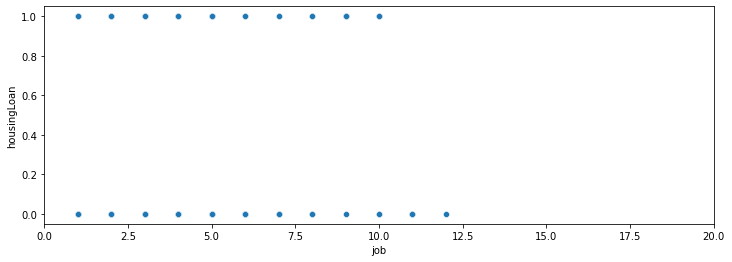

In [36]:
DGraph = df_new.sample(n = 200, random_state = 2)

fig,ax = plt.subplots(figsize=(12,4))
sns.scatterplot(DGraph['job'],DGraph['housingLoan'])
ax.set(xlim=(0, 20))

<AxesSubplot:xlabel='education', ylabel='job'>

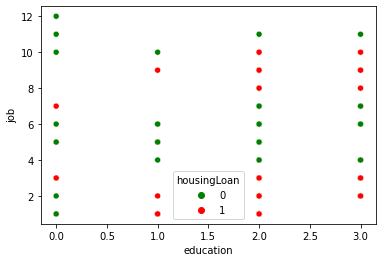

In [37]:
sns.scatterplot(x=DGraph['education'], y=DGraph['job'], hue=DGraph['housingLoan'],palette=['green','red'],data=DGraph)

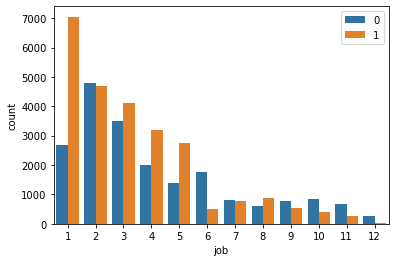

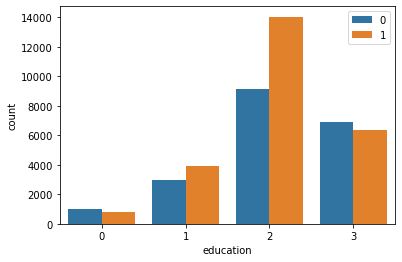

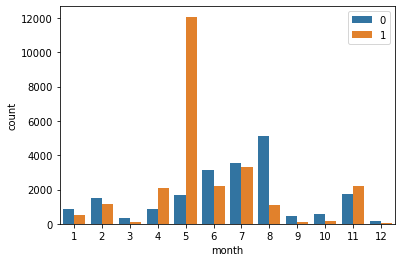

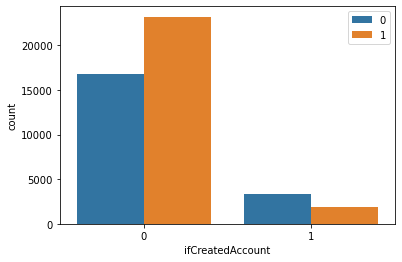

In [38]:
graphs=["job","education","month", "ifCreatedAccount"]

y1 = df_new['housingLoan']
y1 = y1.values



for i in graphs:
    
    sns.countplot(x=i, hue=y1, data=df_new)
    plt.show()